In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-check-ins-and-user-metadata/users_data.csv
/kaggle/input/gym-check-ins-and-user-metadata/checkin_checkout_history_updated.csv
/kaggle/input/gym-check-ins-and-user-metadata/gym_locations_data.csv
/kaggle/input/gym-check-ins-and-user-metadata/subscription_plans.csv


# 1. About Dataset
Dataset Summary: Gym Check-ins and User Metadata
This synthetic dataset represents gym check-ins and user metadata, split across four CSV files. It simulates gym activity across 10 different locations, featuring user details, gym attributes, and check-in history. The dataset now also includes information about different subscription plans.


## Data Description
### Users Data
This file contains detailed information about users who visit the gyms.

user_id: Unique identifier for each user.

first_name: First name of the user.

last_name: Last name of the user.

age: Age of the user.

gender: Gender of the user (Male, Female, Non-binary).

birthdate: Date of birth of the user.

sign_up_date: Date when the user signed up for the gym membership.

user_location: City where the user lives.

subscription_plan: The user's gym subscription plan (Basic, Pro, Student).

### Gym Locations Data
This file describes the gyms and their locations.

gym_id: Unique identifier for each gym.

location: Real-world city where the gym is located (e.g., New York, Los Angeles).

gym_type: The type of gym (Premium, Standard, Budget).

facilities: List of facilities available at the gym (e.g., Swimming Pool, Sauna, Yoga Classes).

### Check-in/Checkout History
This file tracks user check-ins and check-outs at the gyms.

user_id: ID of the user who checked in.

gym_id: ID of the gym where the check-in occurred.

checkin_time: Timestamp of when the user checked in.

checkout_time: Timestamp of when the user checked out.

workout_type: Type of workout performed during the visit (e.g., Cardio, Weightlifting, Yoga).

calories_burned: Estimated number of calories burned during the workout.

### Subscription Plans
This file provides a description of the different subscription plans available to gym members.

subscription_plan: The name of the subscription plan (Basic, Pro, Student).

price_per_month: Price per month in Dollar

features: Which features are present in this subsription

## 1. データセットの概要：ジムのチェックインとユーザーのメタデータ

この合成データセットは、ジムのチェックインおよびユーザーのメタデータを4つのCSVファイルに分割したものです。10か所の異なるジムでの活動をシミュレートしており、ユーザーの詳細、ジムの属性、チェックイン履歴、さらに異なるサブスクリプションプランに関する情報が含まれています。

データの説明

ユーザーデータ

このファイルにはジムを利用するユーザーの詳細な情報が含まれています。

	•	user_id: 各ユーザーのid
	•	first_name: ユーザーの名前。
	•	last_name: ユーザーの姓。
	•	age: ユーザーの年齢。
	•	gender: ユーザーの性別（男性、女性、ノンバイナリー）。
	•	birthdate: ユーザーの生年月日。
	•	sign_up_date: ユーザーがジムのメンバーシップに登録した日。
	•	user_location: ユーザーが住んでいる都市。
	•	subscription_plan: ユーザーのジムのサブスクリプションプラン（ベーシック、プロ、学生）。

ジムのロケーションデータ

このファイルにはジムの所在地と詳細情報が含まれています。

	•	gym_id: 各ジムのid
	•	location: ジムがある実際の都市（例：ニューヨーク、ロサンゼルス）。
	•	gym_type: ジムの種類（プレミアム、スタンダード、バジェット）。
	•	facilities: ジムにある設備の一覧（例：プール、サウナ、ヨガクラス）。

チェックイン・チェックアウト履歴

このファイルは、ジムでのユーザーのチェックイン・チェックアウトを追跡します。

	•	user_id: チェックインしたユーザーのID。
	•	gym_id: チェックインが行われたジムのID。
	•	checkin_time: ユーザーがチェックインした時刻のタイムスタンプ。
	•	checkout_time: ユーザーがチェックアウトした時刻のタイムスタンプ。
	•	workout_type: 訪問時に行ったワークアウトの種類（例：カーディオ、ウェイトリフティング、ヨガ）。
	•	calories_burned: ワークアウト中に消費した推定カロリー数。

サブスクリプションプラン

このファイルには、ジム会員向けの異なるサブスクリプションプランの説明が含まれています。

	•	subscription_plan: サブスクリプションプランの名前（ベーシック、プロ、学生）。
	•	price_per_month: 月額料金（ドル）。
	•	features: そのプランに含まれている機能。

# 2. Frame the Problem and Look at the Big Picture

## 1. Objective in business terms.
The object is to increase the gym-memberships sign-ups and enhanse member retention by understandings user behaviors and preferences.
## 2. How will the solution be used?
By predicting the future user behavior and identifying patterns, the gym could design targeted campaign and refine strategies to increas memberships and retain existing users effectively.
## 3. Frame the problem.
This problem can likely be approached as a supervised learning problem, as the aim is to predict user behavior based on the historical data. Additionally, a combination of classification and regression might be benefitial.
## 4. How I should measure?
• Accuracy and F1 score for Classification Algorithms 
• MAE(Mean Absolute Error) and RMSA(Random Mean Square Error) for Regression Algorithms
## 5. Is the Performance Measure aligned with business objective?
Yes, the metrics like accuracy score and F1 Score can align with anticipating and understanding user behaviors, allowing for effective, data driven decisions on campaign and retention strategies.
## 6. What would be the minimum performance needed to reach the business objective?
The minimum performance would be acheiving the accuracy score or F1 Score that exceeds the baseline. For regression, the MAE and RMSE that minimize the errors to degree where insights are actionable would be good.
## 7. How would you solve the problem manually?
Exploring the data, analyzing user behavior like check-in and check-out time, subscription class, and so on. And classify the user into certain groups, making business strategy that efficient for each groups of users.
## 8. List the assumption I have made so far.
• Users frequently check-in are less likely to cancel their subscripiton.
• User behavior can be influenced by workout-type, gender, and location.
• Subscriptino Plan plays a crucial role in achieving business objectives.

## 2. 問題の枠組みと全体像の確認



  1.	ビジネス目標:
目的は、ユーザーの行動や好みを理解することでジム会員の登録数を増やし、既存会員の維持率を向上させることです。
	
  2.	解決策の活用方法:
将来のユーザー行動を予測し、パターンを特定することで、ジムはターゲットを絞ったキャンペーンを企画し、会員数の増加と既存会員の効果的な維持に向けて戦略を改善できます。

3.	問題の枠組み:
この問題は、過去のデータに基づいてユーザーの行動を予測することを目的とした、教師あり学習問題としてアプローチできる可能性があります。また、分類と回帰の組み合わせが有益かもしれません。
	
 4.	評価方法:
	•	分類アルゴリズムの場合：正解率（Accuracy）とF1スコア
	•	回帰アルゴリズムの場合：MAE（平均絶対誤差）およびRMSE（平方平均二乗誤差）
	
 5.	ビジネス目標に評価指標は一致しているか:
はい、正解率やF1スコアのような指標は、ユーザー行動を予測し理解するためのものであり、データに基づくキャンペーンや会員維持戦略の決定に役立ちます。
	
 6.	ビジネス目標を達成するための最低限のパフォーマンスは？:
最低限のパフォーマンスとして、分類では基準値を超える正解率やF1スコアが必要です。回帰では、MAEやRMSEが誤差を最小限に抑え、行動可能なインサイトが得られるレベルが望ましいです。
	
 7.	手動で問題を解決するとしたら？:
データを探索し、チェックイン・チェックアウト時間やサブスクリプションクラスなどのユーザー行動を分析します。そして、ユーザーを特定のグループに分類し、各グループに最適なビジネス戦略を立てます。
	
 8.	これまでに仮定したこと:
	•	頻繁にチェックインするユーザーは、会員を解約する可能性が低い。
	•	ユーザー行動は、ワークアウトの種類、性別、所在地の影響を受ける可能性がある。
	•	サブスクリプションプランは、ビジネス目標の達成に重要な役割を果たす。

# 3. Get the Data（データの取得）

In [2]:
import pandas as pd

users_data = pd.read_csv('/kaggle/input/gym-check-ins-and-user-metadata/users_data.csv')
gym_location = pd.read_csv('/kaggle/input/gym-check-ins-and-user-metadata/gym_locations_data.csv')
checkin_history = pd.read_csv('/kaggle/input/gym-check-ins-and-user-metadata/checkin_checkout_history_updated.csv')
subscription_plans = pd.read_csv('/kaggle/input/gym-check-ins-and-user-metadata/subscription_plans.csv')

In [3]:
users_data_origin = users_data.copy()
gym_location_origin = gym_location.copy()
checkin_history_origin = checkin_history.copy()
subscription_plans_origin = subscription_plans.copy()

In [4]:
subscription_plans.head()

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [5]:
from IPython.display import HTML

# Inject CSS to change the header background color and font color for all DataFrames
HTML("""
<style>
    table.dataframe th {
        background-color: black !important;
        color: white !important;
    }
</style>
""")

## Take a quick look at the data

### • Users Data（ユーザーデータ）

In [6]:
users_data

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic
...,...,...,...,...,...,...,...,...,...
4995,user_4996,Sarah,Williams,33,Male,1958-01-13,2021-08-08,Las Vegas,Basic
4996,user_4997,Linda,Brown,22,Male,1974-02-20,2023-01-22,Austin,Student
4997,user_4998,Emily,Miller,38,Non-binary,1978-03-29,2021-04-16,Atlanta,Pro
4998,user_4999,Robert,Garcia,27,Male,2002-02-01,2022-07-02,Denver,Pro


This is a data of 5000 user demographic, giving insight into each users features, how long they have been in the membership and type of subscription plan. It appears that `age` and `birthdata` are redundunt, as they gave alomost same information. (5000人のユーザーデモグラフィックデータです。最終データ集計日までの会員期間と、サブスクプランのデータも含まれています。　年齢と誕生日カラムに関しては得られる情報は重複してます。)

In [7]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            5000 non-null   object
 1   first_name         5000 non-null   object
 2   last_name          5000 non-null   object
 3   age                5000 non-null   int64 
 4   gender             5000 non-null   object
 5   birthdate          5000 non-null   object
 6   sign_up_date       5000 non-null   object
 7   user_location      5000 non-null   object
 8   subscription_plan  5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


### • Gym Location

In [8]:
gym_location

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"
5,gym_6,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
6,gym_7,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
7,gym_8,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
8,gym_9,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
9,gym_10,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


This data frame represents the feature of each gym. It could be useful to get to know how much its location and facilities attribute to the number of gym members.

In [9]:
gym_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gym_id      10 non-null     object
 1   location    10 non-null     object
 2   gym_type    10 non-null     object
 3   facilities  10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [10]:
gym_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gym_id      10 non-null     object
 1   location    10 non-null     object
 2   gym_type    10 non-null     object
 3   facilities  10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


### Checkin History

In [11]:
checkin_history.head()
checkin_history.groupby('user_id').first().reset_index().head()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_1,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468
1,user_10,gym_6,2023-03-03 11:02:00,2023-03-03 11:36:00,Swimming,1438
2,user_100,gym_8,2023-08-01 19:50:00,2023-08-01 22:16:00,Cardio,559
3,user_1000,gym_3,2023-08-07 09:49:00,2023-08-07 12:14:00,Pilates,633
4,user_1001,gym_9,2023-03-29 11:27:00,2023-03-29 13:49:00,Cardio,1108


In [12]:
checkin_history.sort_values(by="checkin_time")

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
4007,user_4603,gym_5,2023-01-01 06:00:00,2023-01-01 08:05:00,CrossFit,526
274780,user_3678,gym_9,2023-01-01 06:03:00,2023-01-01 07:48:00,Pilates,725
241044,user_254,gym_7,2023-01-01 06:03:00,2023-01-01 08:48:00,Yoga,616
132392,user_3780,gym_3,2023-01-01 06:04:00,2023-01-01 07:29:00,Weightlifting,1036
285103,user_4040,gym_1,2023-01-01 06:07:00,2023-01-01 07:27:00,Cardio,584
...,...,...,...,...,...,...
218510,user_3965,gym_9,2023-10-15 20:56:00,2023-10-15 23:13:00,Swimming,391
286607,user_2360,gym_8,2023-10-15 20:56:00,2023-10-15 22:42:00,Pilates,1326
49236,user_2423,gym_7,2023-10-15 20:58:00,2023-10-15 21:35:00,CrossFit,624
66504,user_4577,gym_7,2023-10-15 20:59:00,2023-10-15 22:38:00,CrossFit,945


This is a individual checkin and checkout time history data in terms of 2023-01-01 to 2023-10-15.

In [13]:
checkin_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          300000 non-null  object
 1   gym_id           300000 non-null  object
 2   checkin_time     300000 non-null  object
 3   checkout_time    300000 non-null  object
 4   workout_type     300000 non-null  object
 5   calories_burned  300000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


### Subscripiton Plans

In [14]:
subscription_plans.head()
subscription_plans["features"].unique()

array(['Access to basic gym facilities, Limited class access, 1 guest pass per month',
       'Access to all facilities, Unlimited class access, 5 guest passes per month, Free personal trainer session',
       'Access to basic facilities, Limited class access, 1 guest pass per month, Discounted for students'],
      dtype=object)

This gives us concreate information about each subscription plan.（それぞれのプランに関する情報を持ったテーブルです。）

In [15]:
subscription_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subscription_plan  3 non-null      object 
 1   price_per_month    3 non-null      float64
 2   features           3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


## Merge the dataframes (データフレームのマージ)

Each dataframe doesn't have any null value and it is good to use for input datasets. However there are four data frame in total so it is better to convert them into single dataframe to use as an input for machine learning models. 
(４つのテーブルはNUllデータを含んでおらず、機械学習モデルのインプットとして理想的です。しかし最終的なインプットとして利用するためにはこれらのテーブルを一つのテーブルにマージすること必要があります。)

### 1. Identify key relationships between dataframe(データフレーム間のKeyとなる関係)
   user_id: This is a primary key between user_data and checkin_history dataframe. It connect user demographics with their gym checkin history
   (user_data と　checkin_history を繋ぐ主要キー。ユーザーデモグラフィックとそれぞれのチェクインの履歴を結んでいる。)
   
   gym_id: This is a primary key between gym_location and checkin_history dataframe. It connect gym attributes with checkin history.
   (gym_location, checkin_historyを繋ぐキーでジムの情報とチェックイン履歴を結んでいる。)
   
   
   subscription_plan: It can connect user_data and subscription_plans dataframe
   (user_data , subscription_planを繋ぐキー)

### 2. Merge the Data Frame(マージ)

First, merge users_data and subscription_plans on `subscription_plan`
(まず、user_data と　subscription_plans テーブルをsubscription_plan カラムでマージ)


In [16]:
users_data = pd.merge(users_data, subscription_plans, on="subscription_plan", how="left")

In [17]:
users_data.head()

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,price_per_month,features
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic,19.99,"Access to basic gym facilities, Limited class ..."
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ..."


Second, merge gym_location and checkin_history on `gym_location` column
（次に、　gym_location と　checkin_historyテーブルをgym_location カラムでマージ）

In [18]:
checkin_history = pd.merge(checkin_history, gym_location, on="gym_id", how="left")

In [19]:
checkin_history.head()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


Finally, merge these two dataframes（最後に、　先で得た２つのデータフレームをマージ）

In [20]:
full_data = pd.merge(checkin_history, users_data, on="user_id", how="left")
# show only one row for each unique feature of "user_id" column
# user_idカラムのユニークなデータを一つのみ取り出します。
full_data.groupby("user_id").first().sort_values(by="user_id").reset_index()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,price_per_month,features
0,user_1,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,user_10,gym_6,2023-03-03 11:02:00,2023-03-03 11:36:00,Swimming,1438,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",John,Jones,28,Non-binary,2005-10-30,2022-06-24,Detroit,Basic,19.99,"Access to basic gym facilities, Limited class ..."
2,user_100,gym_8,2023-08-01 19:50:00,2023-08-01 22:16:00,Cardio,559,San Diego,Standard,"Basketball Court, Sauna, CrossFit",David,Jones,61,Male,1968-02-26,2022-06-25,Austin,Student,9.99,"Access to basic facilities, Limited class acce..."
3,user_1000,gym_3,2023-08-07 09:49:00,2023-08-07 12:14:00,Pilates,633,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool",Robert,Miller,19,Female,1980-12-27,2023-05-18,Seattle,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4,user_1001,gym_9,2023-03-29 11:27:00,2023-03-29 13:49:00,Cardio,1108,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",Emily,Jones,30,Female,1986-12-03,2021-04-13,San Francisco,Student,9.99,"Access to basic facilities, Limited class acce..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,user_995,gym_2,2023-01-04 14:14:00,2023-01-04 16:23:00,Cardio,983,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",Linda,Jones,27,Male,2001-03-09,2022-09-30,Seattle,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4996,user_996,gym_4,2023-07-22 19:47:00,2023-07-22 21:14:00,Swimming,1469,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",Jessica,Miller,22,Male,1983-06-11,2023-04-08,Boston,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4997,user_997,gym_2,2023-06-07 15:09:00,2023-06-07 16:38:00,Yoga,798,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",Jessica,Davis,40,Male,1969-01-16,2022-05-06,Atlanta,Basic,19.99,"Access to basic gym facilities, Limited class ..."
4998,user_998,gym_10,2023-09-05 10:01:00,2023-09-05 11:47:00,Weightlifting,502,San Jose,Premium,"Swimming Pool, Sauna, CrossFit",David,Martinez,27,Male,1996-10-26,2023-06-27,Orlando,Pro,49.99,"Access to all facilities, Unlimited class acce..."


Some values of user_id column weren't correctly sorted so I am removing the stirng part from it and remain only numeric part.

In [21]:
full_data["user_id"] = full_data["user_id"].str.extract('(\d+)').astype("int")

In [22]:
full_data.groupby("user_id").first().sort_values(by="user_id").reset_index()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,price_per_month,features
0,1,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,2,gym_2,2023-01-17 20:55:00,2023-01-17 23:51:00,Swimming,940,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,3,gym_10,2023-01-25 17:16:00,2023-01-25 18:32:00,CrossFit,520,San Jose,Premium,"Swimming Pool, Sauna, CrossFit",Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic,19.99,"Access to basic gym facilities, Limited class ..."
3,4,gym_8,2023-04-16 08:35:00,2023-04-16 09:59:00,Swimming,826,San Diego,Standard,"Basketball Court, Sauna, CrossFit",David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4,5,gym_3,2023-01-13 16:45:00,2023-01-13 18:21:00,Yoga,577,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool",Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,gym_9,2023-03-21 07:59:00,2023-03-21 09:57:00,Yoga,996,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",Sarah,Williams,33,Male,1958-01-13,2021-08-08,Las Vegas,Basic,19.99,"Access to basic gym facilities, Limited class ..."
4996,4997,gym_4,2023-09-29 20:31:00,2023-09-29 21:49:00,Yoga,312,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",Linda,Brown,22,Male,1974-02-20,2023-01-22,Austin,Student,9.99,"Access to basic facilities, Limited class acce..."
4997,4998,gym_1,2023-06-20 13:51:00,2023-06-20 15:59:00,Yoga,393,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",Emily,Miller,38,Non-binary,1978-03-29,2021-04-16,Atlanta,Pro,49.99,"Access to all facilities, Unlimited class acce..."
4998,4999,gym_6,2023-08-31 08:21:00,2023-08-31 09:23:00,Cardio,1939,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",Robert,Garcia,27,Male,2002-02-01,2022-07-02,Denver,Pro,49.99,"Access to all facilities, Unlimited class acce..."


In [23]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            300000 non-null  int64  
 1   gym_id             300000 non-null  object 
 2   checkin_time       300000 non-null  object 
 3   checkout_time      300000 non-null  object 
 4   workout_type       300000 non-null  object 
 5   calories_burned    300000 non-null  int64  
 6   location           300000 non-null  object 
 7   gym_type           300000 non-null  object 
 8   facilities         300000 non-null  object 
 9   first_name         300000 non-null  object 
 10  last_name          300000 non-null  object 
 11  age                300000 non-null  int64  
 12  gender             300000 non-null  object 
 13  birthdate          300000 non-null  object 
 14  sign_up_date       300000 non-null  object 
 15  user_location      300000 non-null  object 
 16  su

To get some insights, go a little deeper for each columns.（こちらの結合したデータフレームの中身を少し詳しく見ていきデータの特徴を見ていきます。）

# 4. Explore the Data（データの探索）

## <div style="text-align: center; padding: 15px; marging:0; coloro: white; font:Times New Romen; background-color:#33CCCC; "><b>Univariate Analysys</b></div>

First of all, I will drop some columns that don't really give informative information. As of now, `first_name`, `last_name`, and `birthdate` appears not crucial for this task.（まず、　今回のプロジェクトのゴールに有益ではないカラムをドロップします。　first_name, last_name, birthdata こちら３つをドロップします。）

In [24]:
full_data = full_data.drop(["first_name", "last_name", "birthdate"], axis=1)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            300000 non-null  int64  
 1   gym_id             300000 non-null  object 
 2   checkin_time       300000 non-null  object 
 3   checkout_time      300000 non-null  object 
 4   workout_type       300000 non-null  object 
 5   calories_burned    300000 non-null  int64  
 6   location           300000 non-null  object 
 7   gym_type           300000 non-null  object 
 8   facilities         300000 non-null  object 
 9   age                300000 non-null  int64  
 10  gender             300000 non-null  object 
 11  sign_up_date       300000 non-null  object 
 12  user_location      300000 non-null  object 
 13  subscription_plan  300000 non-null  object 
 14  price_per_month    300000 non-null  float64
 15  features           300000 non-null  object 
dtypes:

### <div style="text-align:left"; background_color:><b>• Check-in and Check-out（チェックインとチェックアウト）</b></div>

In [25]:
print(full_data["checkin_time"].max())
print(full_data["checkin_time"].min())

2023-10-15 20:59:00
2023-01-01 06:00:00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


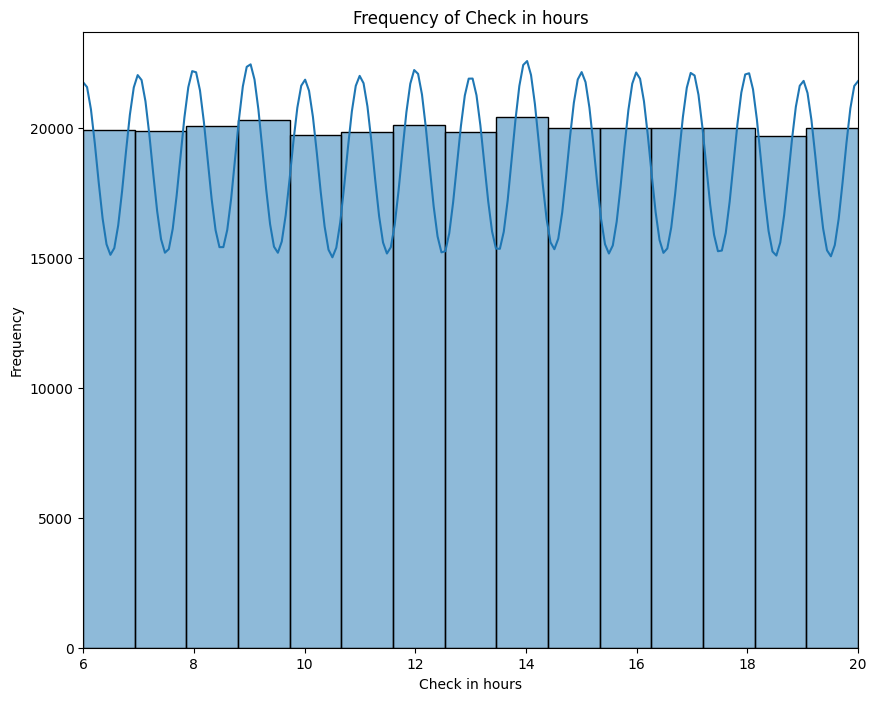

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

full_data["checkin_hours"] = pd.to_datetime(full_data["checkin_time"]).dt.hour


plt.figure(figsize=(10, 8))
sns.histplot(full_data["checkin_hours"], bins=15, kde=True)
plt.xlim(6, 20)
plt.xlabel("Check in hours")
plt.ylabel("Frequency")
plt.title("Frequency of Check in hours")

plt.savefig("checkin-hours-distribution.png", format="png")
plt.show()

### Insights
The checkin time ranges from 6am to 8pm and distributed almost equally across all ranges of time.Regardless of time, the gyms constantly be used.And now, I am wondering how long users stay in the facility.(チェックイン時間は6am から　8pmに分布しており、 分布は横ばいです。ユーザーのジム滞在時間を見ていきましょう。)


In [27]:
full_data["stay_time"] = pd.to_datetime(full_data["checkout_time"])-pd.to_datetime(full_data["checkin_time"])
# convert this into the number in minutes
full_data["stay_time"] = full_data["stay_time"].dt.total_seconds() / 60

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Frequency of stay time(min)')

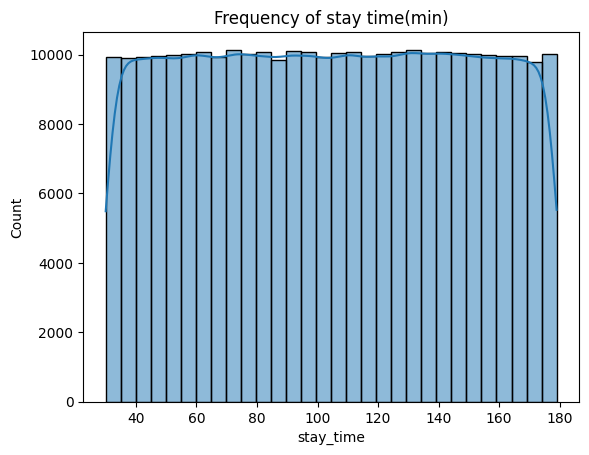

In [28]:
sns.histplot(full_data["stay_time"], bins=30, kde=True)
plt.title("Frequency of stay time(min)")

The time of users using gym is alomst equally distributed across 30 minutes to 180 minutes. The enthusiasim of users toward going to gym widely ranges.（滞在時間はおおよそ30分から180分で、　情熱度合いは様々ですね。）

### • Workout Type

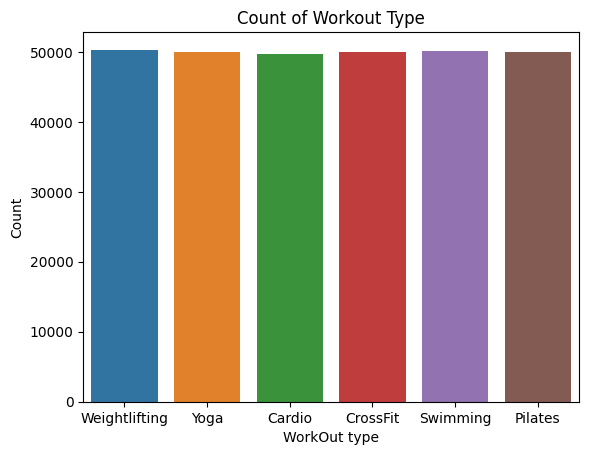

In [29]:
sns.countplot(x="workout_type", data=full_data)
plt.xlabel("WorkOut type")
plt.ylabel("Count")
plt.title("Count of Workout Type")
plt.show()

### Insight
There is no significant difference among the number of puropose of gym usage, as they are almost equally distributed.(人気のワークアウトのタイプにおいては大きな違いは見られません。)

### • Location

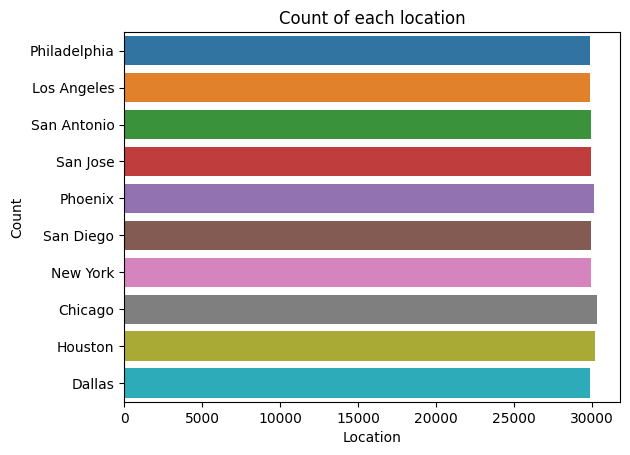

In [30]:
sns.countplot(y="location", data=full_data)
plt.title("Count of each location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

### Insight
The location of the gym appears not affectes the amount of tiem gym being used（各地に点在しているジムの利用頻度にも大きな差は見られません。）

### Gym Type(ジムのタイプ)

Text(0.5, 1.0, 'Count of each gym_type')

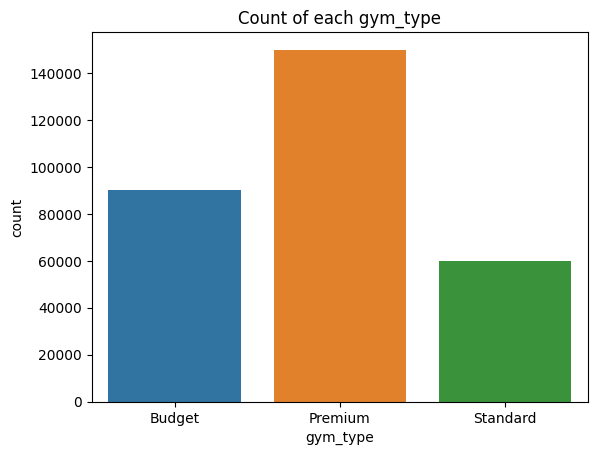

In [31]:
sns.countplot(x="gym_type", data=full_data)
plt.title("Count of each gym_type")

###　Insight
It is obviously the difference of popularity for the gym type among these three types. The premium plan must be most expensive one, yet it still be most popular type. I reckon it is because the quality of its facility meet the users expectations and needs.（プランの人気には顕著な差があり、プレミアム（最高値）、　低価格（最安値）、　スタンダード（中間）の順に推移しています。）

### Age(年齢)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Frequency of age of users')

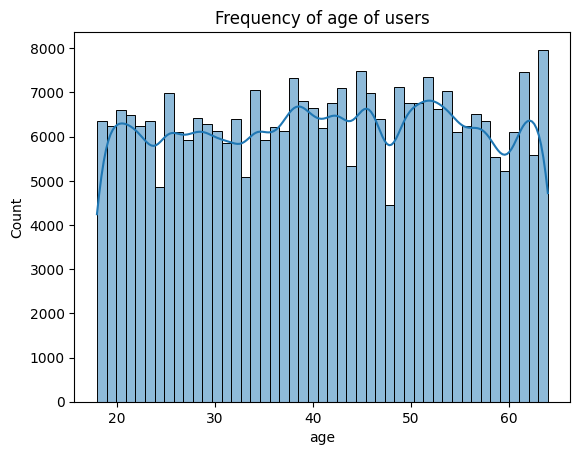

In [32]:
sns.histplot(full_data["age"], bins=47, kde=True)
plt.title("Frequency of age of users")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distributino of age of user in membership')

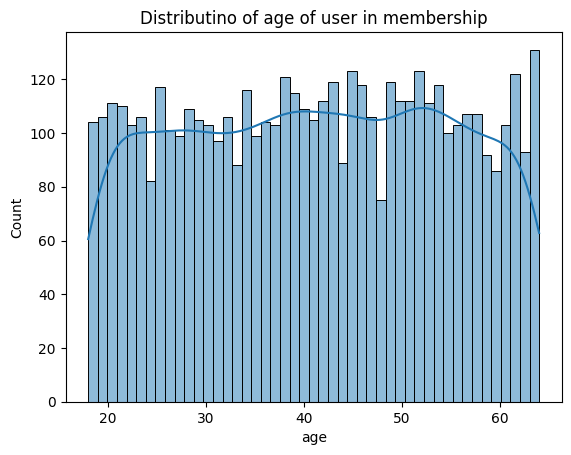

In [33]:
sns.histplot(users_data["age"], bins=47, kde=True)
plt.title("Distributino of age of user in membership")

The figure above represents the freaquency of users's age visiting the gym, while the one below showing the distribution of user's age currentyly in signing up the gym. There is no gab between the number of users actually using the gym and not. It appears that regardless of the age the number of users using the gym doesn't really fractuate. The highest number of gym subscribers are age of 64.
（上の図はチェックイン履歴の年齢分布、下は登録者の年齢分布です。ほぼ同様に分布しており実際に登録しているユーザーと彼らの利用実態に大きなギャップはないことがわかります。）

### Gender（ジェンダー）

Text(0.5, 1.0, 'User Distribution')

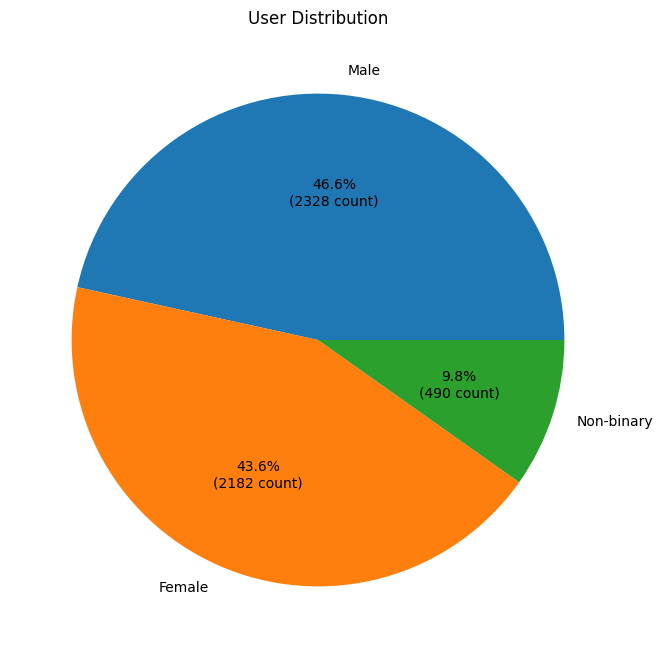

In [34]:
actual_gender_counts = users_data["gender"].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count} count)'
    return my_autopct
    
plt.figure(figsize=(10, 8))
plt.pie(actual_gender_counts, labels=actual_gender_counts.index,
        autopct=make_autopct(actual_gender_counts), )
plt.title("User Distribution")

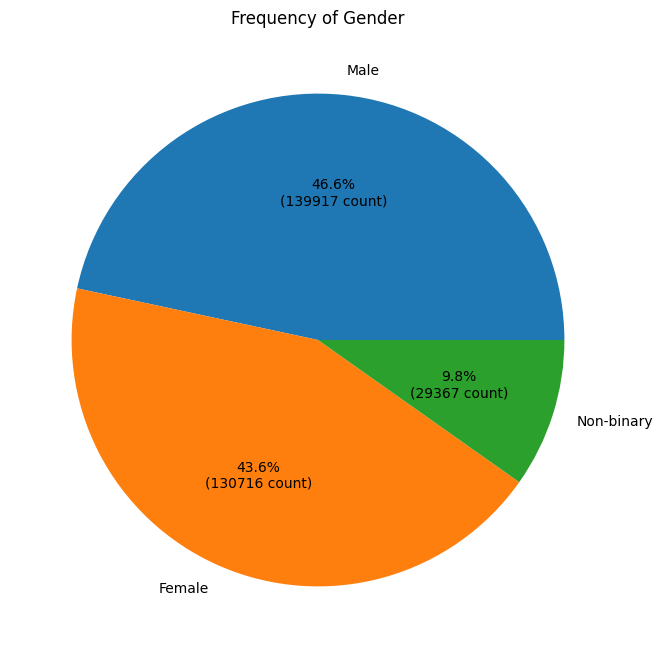

In [35]:
frequency_gender_counts = full_data["gender"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(frequency_gender_counts, labels=frequency_gender_counts.index,
       autopct=make_autopct(frequency_gender_counts))
plt.title("Frequency of Gender")
plt.show()

There is no gab between the distribution of genders belonging to the gyms and the frequency of gender using the gym（先ほどと同様チェックインデータの年齢分布と登録ユーザーの年齢分布の比較です。こちらもギャップは見られません。先ほどの結果から利用実体に大きなギャップは見られないとわかっていたので当然の結果です。）

### • Sign up Data（登録日）

It is more efficient as an input to convert this the terms of days being the member of the gym by subtracting the current datetime data.　（登録日は最終集計日時点までの登録日数とも言い換えられるので、そちらをデータとして利用します。）

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


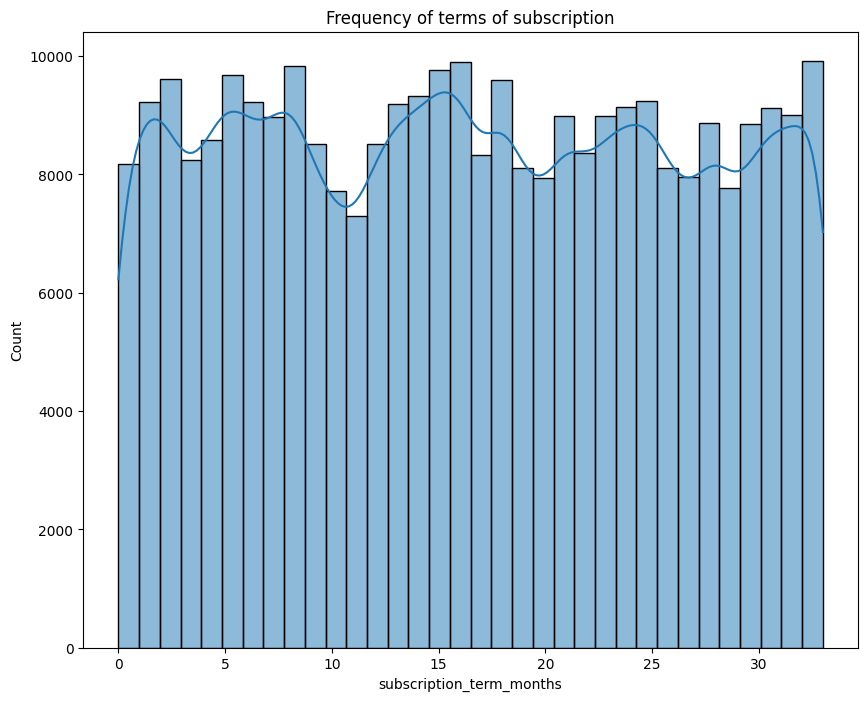

In [36]:
from datetime import datetime

target_date = datetime(2023, 10, 16)
full_data["subscription_term_days"] = (target_date - (pd.to_datetime(full_data["sign_up_date"]))).dt.days
# transform it in months
full_data["subscription_term_months"] = full_data["subscription_term_days"] // 30
plt.figure(figsize=(10, 8))
sns.histplot(x="subscription_term_months", data=full_data, bins=34, kde=True)
plt.title("Frequency of terms of subscription")
plt.show()


### User Location　（ユーザーのロケーション）

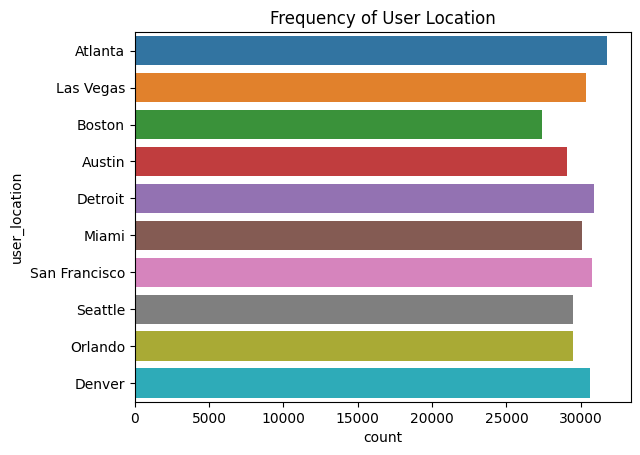

In [37]:
sns.countplot(y="user_location", data=full_data)
plt.title("Frequency of User Location")
plt.show()

### • Subscription Plan（サブスクプラン）

Text(0.5, 1.0, 'Frequency of subscription plan')

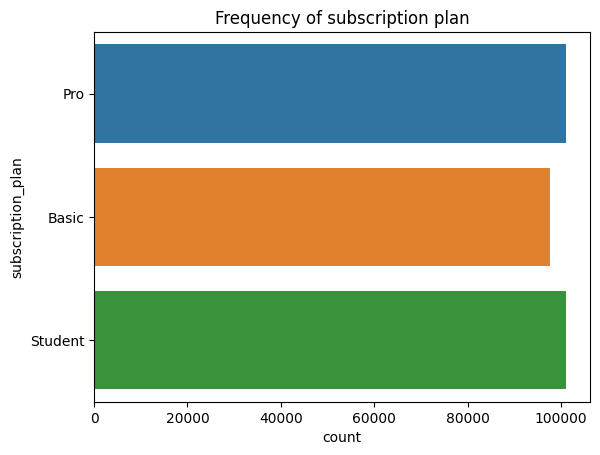

In [38]:
sns.countplot(y="subscription_plan", data=full_data)
plt.title("Frequency of subscription plan")

## <div style="text-align: center; font:Times New Romen; padding:15px; marging: 0; color:white; background-color: #33CCCC; "><b>Bivariate Analysis</b></div>

２データ間の関係性を見ていきます。

In [39]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   300000 non-null  int64  
 1   gym_id                    300000 non-null  object 
 2   checkin_time              300000 non-null  object 
 3   checkout_time             300000 non-null  object 
 4   workout_type              300000 non-null  object 
 5   calories_burned           300000 non-null  int64  
 6   location                  300000 non-null  object 
 7   gym_type                  300000 non-null  object 
 8   facilities                300000 non-null  object 
 9   age                       300000 non-null  int64  
 10  gender                    300000 non-null  object 
 11  sign_up_date              300000 non-null  object 
 12  user_location             300000 non-null  object 
 13  subscription_plan         300000 non-null  o

### 1. Age and Calories burned　（年齢とカロリー消費）

Text(0, 0.5, 'Calories Burned')

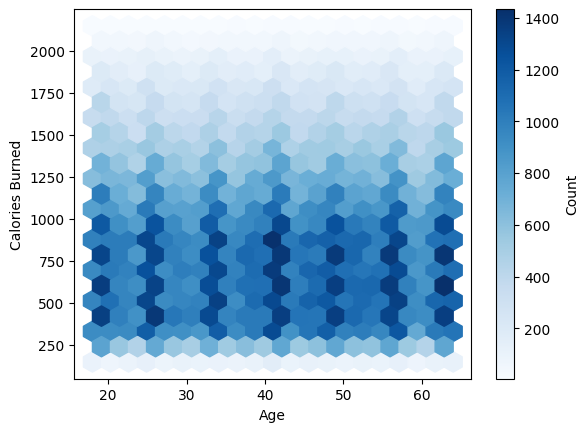

In [40]:
plt.hexbin(full_data["age"], full_data["calories_burned"], gridsize=20, cmap="Blues")
plt.colorbar(label="Count")
plt.xlabel("Age")
plt.ylabel("Calories Burned")

It indicates that the most frequently burned calorie range is from about 400 to around 1000 kcal across all ages. The densest area appears between age of late 30s and late 50s, suggesting middle ages individuals tend to burn more calories than younger people. Additionally, there is a noticable concentration of clalories burned among individuals over 60.　（カロリー消費の分布はすべての年齢層においておおよそ400から1000付近に集中していることがわかります。　特にミドルエイジ（３０後半から５０後半のユーザーがよりこの範囲のカロリーを燃やしています。））

### 2. Age and Supscription Plan（年齢とサブスクプラン）

In [41]:
unique_user = full_data.groupby("user_id").first().sort_values(by="user_id").reset_index()
unique_user

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,age,gender,sign_up_date,user_location,subscription_plan,price_per_month,features,checkin_hours,stay_time,subscription_term_days,subscription_term_months
0,1,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",56,Female,2023-02-06,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ...",8,134.0,252,8
1,2,gym_2,2023-01-17 20:55:00,2023-01-17 23:51:00,Swimming,940,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna",46,Non-binary,2023-08-08,Orlando,Pro,49.99,"Access to all facilities, Unlimited class acce...",20,176.0,69,2
2,3,gym_10,2023-01-25 17:16:00,2023-01-25 18:32:00,CrossFit,520,San Jose,Premium,"Swimming Pool, Sauna, CrossFit",32,Female,2021-01-11,Orlando,Basic,19.99,"Access to basic gym facilities, Limited class ...",17,76.0,1008,33
3,4,gym_8,2023-04-16 08:35:00,2023-04-16 09:59:00,Swimming,826,San Diego,Standard,"Basketball Court, Sauna, CrossFit",60,Male,2023-08-07,Denver,Pro,49.99,"Access to all facilities, Unlimited class acce...",8,84.0,70,2
4,5,gym_3,2023-01-13 16:45:00,2023-01-13 18:21:00,Yoga,577,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool",25,Female,2021-01-08,Denver,Basic,19.99,"Access to basic gym facilities, Limited class ...",16,96.0,1011,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,gym_9,2023-03-21 07:59:00,2023-03-21 09:57:00,Yoga,996,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",33,Male,2021-08-08,Las Vegas,Basic,19.99,"Access to basic gym facilities, Limited class ...",7,118.0,799,26
4996,4997,gym_4,2023-09-29 20:31:00,2023-09-29 21:49:00,Yoga,312,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",22,Male,2023-01-22,Austin,Student,9.99,"Access to basic facilities, Limited class acce...",20,78.0,267,8
4997,4998,gym_1,2023-06-20 13:51:00,2023-06-20 15:59:00,Yoga,393,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",38,Non-binary,2021-04-16,Atlanta,Pro,49.99,"Access to all facilities, Unlimited class acce...",13,128.0,913,30
4998,4999,gym_6,2023-08-31 08:21:00,2023-08-31 09:23:00,Cardio,1939,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",27,Male,2022-07-02,Denver,Pro,49.99,"Access to all facilities, Unlimited class acce...",8,62.0,471,15


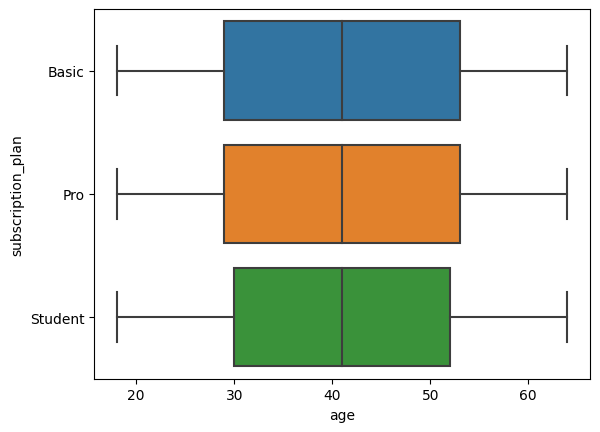

In [42]:
sns.boxplot(x="age", y="subscription_plan", data=unique_user)
plt.savefig("subscriptino plan box plot")

### Insight
Each subscription plan has a fairly balanced age distribution across the middle age ranges.(すべての年齢において３つそれぞれのプランへの加入に偏りは見られません。)

Next, I am goint to see the preference of choise based on their age.(年齢別のプラン選択の傾向を見ていきます)


## Preprocess across the each data frame

The dataset primarily consist of columns with data in the object type, which are not directly suitable for machine learning models. I need to preprocess the data to make them suitable for machine learning models, for example by dropping uninformative columns and encoding the categorical data.